In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.io import imsave
from skimage.transform import resize
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
inception = load_model('inception_resnet_v2_model.h5')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
inception._make_predict_function()

In [4]:
def show_gray_image(image):
    plt.imshow(rgb2lab(image)[:,:,0]*255/100, cmap='gray')

In [5]:
# takes pixels values between [0, 255] and scales values between [-1,1]
def preprocess_input(im):
    return 2*(im/255.0)-1.0

In [6]:
# takes pixel values between [0, 255] and returns gray image of dim-3 between [0,1]
def turn_gray(im):
    return gray2rgb(rgb2lab(im/255)[:,:,0]/100)

In [7]:
def embed(images):
    images = preprocess_input(turn_gray(images)*255)
    images = resize(images, (images.shape[0], 299, 299, 3))
    return inception.predict(images)

In [8]:
model = load_model('farm_final_model.h5')

In [9]:
path = './video/farm1'
for i in range(1, 361):
    print(path + '/farm1-{:03d}.jpg'.format(i))

./video/farm1/farm1-001.jpg
./video/farm1/farm1-002.jpg
./video/farm1/farm1-003.jpg
./video/farm1/farm1-004.jpg
./video/farm1/farm1-005.jpg
./video/farm1/farm1-006.jpg
./video/farm1/farm1-007.jpg
./video/farm1/farm1-008.jpg
./video/farm1/farm1-009.jpg
./video/farm1/farm1-010.jpg
./video/farm1/farm1-011.jpg
./video/farm1/farm1-012.jpg
./video/farm1/farm1-013.jpg
./video/farm1/farm1-014.jpg
./video/farm1/farm1-015.jpg
./video/farm1/farm1-016.jpg
./video/farm1/farm1-017.jpg
./video/farm1/farm1-018.jpg
./video/farm1/farm1-019.jpg
./video/farm1/farm1-020.jpg
./video/farm1/farm1-021.jpg
./video/farm1/farm1-022.jpg
./video/farm1/farm1-023.jpg
./video/farm1/farm1-024.jpg
./video/farm1/farm1-025.jpg
./video/farm1/farm1-026.jpg
./video/farm1/farm1-027.jpg
./video/farm1/farm1-028.jpg
./video/farm1/farm1-029.jpg
./video/farm1/farm1-030.jpg
./video/farm1/farm1-031.jpg
./video/farm1/farm1-032.jpg
./video/farm1/farm1-033.jpg
./video/farm1/farm1-034.jpg
./video/farm1/farm1-035.jpg
./video/farm1/farm1-

In [10]:
try:
    with open('X_farmvid1.pkl', 'rb') as handle:
        X = pickle.load(handle)
except:
    path = './video/farm1/'
    X = []
    for i in range(1, 361):
        X.append(img_to_array(load_img(path + 'farm1-{:03d}.jpg'.format(i)).resize((256, 256)))/255)
    X = np.array(X)
    with open('X_farmvid1.pkl', 'wb') as handle:
        pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
X_lab = rgb2lab(X)

In [12]:
X_L = X_lab[:,:,:,0].reshape(X_lab[:,:,:,0].shape + (1,))
X_ab = X_lab[:,:,:,1:]

In [13]:
predictions = model.predict([X_L[16:24]/100, embed(X[16:24]*255)], batch_size=8)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [14]:
predictions.shape

(8, 256, 256, 2)

In [15]:
recolored_images = []
for image in np.concatenate([X_L[16:24], predictions*128], axis=-1):
    recolored_images.append(lab2rgb(image))
recolored_images = np.array(recolored_images)

In [13]:
try:
    with open('recolored_tundra_final.pkl', 'rb') as handle:
        recolored_images = pickle.load(handle)
    
except:
    predictions = model.predict([X_L/100, embed(X*255)], batch_size=8)
    
    recolored_images = []
    for image in np.concatenate([X_L, predictions*128], axis=-1):
        recolored_images.append(lab2rgb(image))
    recolored_images = np.array(recolored_images)
    with open('recolored_tundra_final.pkl', 'wb') as handle:
        pickle.dump(recolored_images, handle, protocol=pickle.HIGHEST_PROTOCOL)

/home/goodwin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/goodwin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


MemoryError: 

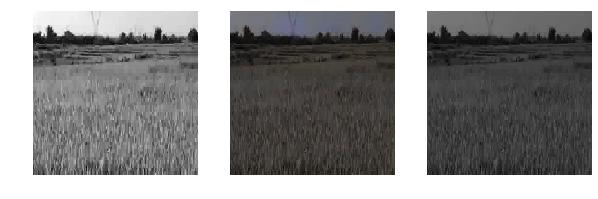

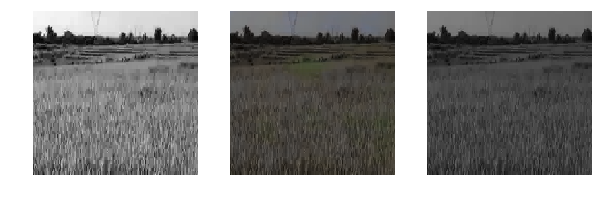

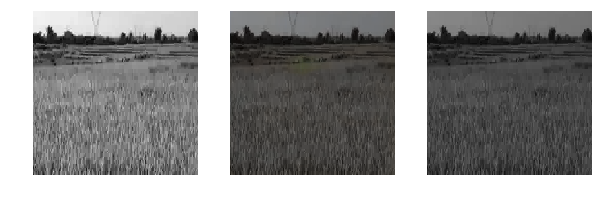

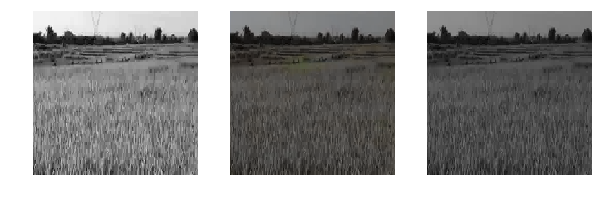

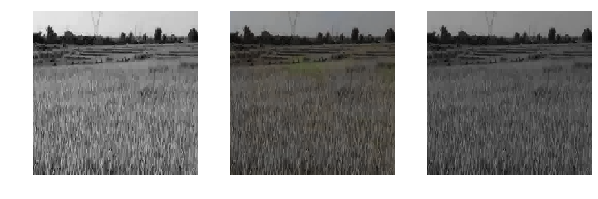

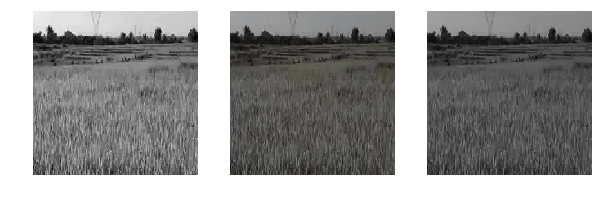

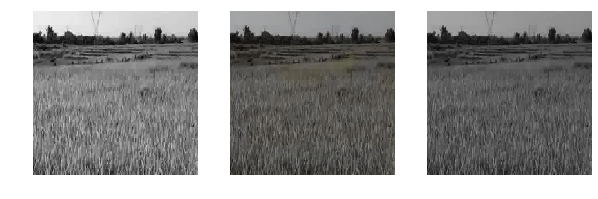

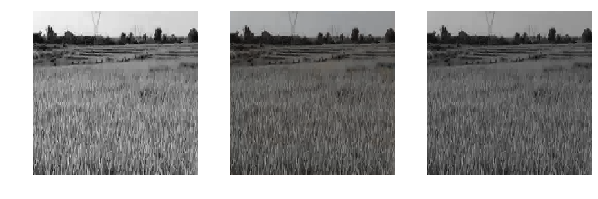

In [21]:
for i in range(8):
    fig = plt.figure(figsize=(10, 30))
    fig.add_subplot(131)
    plt.gca().axis('off')
    show_gray_image(X[i+16])
    fig.add_subplot(132)
    plt.gca().axis('off')
    plt.imshow(recolored_images[i])
    fig.add_subplot(133)
    plt.gca().axis('off')
    plt.imshow(X[i+16])
    plt.show()

In [21]:
model.evaluate([X_L[:128]/100, embed(X[:128]*255)], X_ab[:128]/128, batch_size=8)

/home/goodwin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/goodwin/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


128/128 [==============================] - 21s 165ms/step


0.004743539771880023

In [18]:
X_ab[:8].shape

(8, 256, 256, 2)